# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Michele M. Angkiriwang
- **Email:** michelleangkiriwang2904@gmail.com
- **ID Dicoding:** michele_m._angkiriwang_Rnsj

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap rata-rata jumlah penyewaan pada tahun 2011-2012 ?
- Bagaimana pengaruh hari libur terhadap peningkatan atau penurunan jumlah penyewa sepeda pada tahun 2011 dan 2012?



## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
#Untuk membaca dataset yang diupload
dfDay = pd.read_csv("day.csv", delimiter=",")
dfHour = pd.read_csv("hour.csv", delimiter=",")


**Insight:**
- Gathering data diawali dengan membaca dataset penyewaan sepeda yaitu day.csv yang memuat data penyewaan sepeda per hari dan hour.csv yang memuat data penyewaan sepeda per jam di suatu hari dengan menggunakan pandas library.

### Assessing Data

In [4]:
#Untuk menampilkan tipe data tiap kolom pada 2 data frame
dfDay.info()
dfHour.info()

#Untuk mengidentifikasi akumulasi missing value pada dataframe
dfDay.isnull().sum()
dfHour.isnull().sum()

dfDay.isna().sum()
dfHour.isna().sum()
#Untuk mengidentifikasi akumulasi duplikasi yang mungkin terjadi
print("")
print("Jumlah duplikasi yang terjadi di dataframe harian : ", dfDay.duplicated().sum())
print("Jumlah duplikasi yang terjadi di dataframe jam : ", dfHour.duplicated().sum())
print("")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Menggunakan function info untuk mengetahui tipe data dari tiap column di dataframe. Terlihat bahwa column dteday pada kedua dataframe masih bertipe object dimana seharusnya bertipe datetime. Hal ini akan diperbaiki dilangkah cleaning data.
- Menggunakan function duplicated dengan kombinasi dengan function sum untuk mengetahui jumlah data yang terduplikasi untuk setiap dataframe. Dan hasilnya ternyata tidak ada duplikasi.
**-Pada code tidak terdapat data merge, karena data yang dianalisis memiliki variabel yang mirip, sehingga jika ingin dianalisis hari maka akan langsung menggunakan data harian, dan jika dianalisis jam maka dapat langsung menggunakan data jam.**

### Cleaning Data

In [5]:
#inisialisasi kolom yang akan digantikan tipe datanya
dayToDatetime = ["dteday"]

#Mengganti setiap isi dari dteday di dataset day dan hour dengan format datetime
for column in dayToDatetime:
    dfDay[column] = pd.to_datetime(dfDay[column])
    dfHour[column] = pd.to_datetime(dfHour[column])

#Untuk mengubah data int menjadi categorical
dfDay.info()
dfHour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Mengkonversikan tipe data dteday yang mendeskripsikan tanggal pencatatan sewa sepeda dari object menjadi datetime dengan menggunakan function to_datetime dari lib pandas
-Data lainnya tidak terdapat duplicate maupun missing value sehingga tidak dilakukan teknik cleaning data lainnya.

## Exploratory Data Analysis (EDA)

### Explore ...

In [6]:
#Untuk menampilkan hasil descriptive statistic
dfDay.describe(include='all')
dfHour.describe(include='all')

#Mengeksplorasi data untuk pertanyaan pertama
#memunculkan data rata-rata, nilai maks, dan nilai min dari total pernyewaan sepeda berdasarkan cuaca
weatherPredict = dfDay.groupby(by=['yr', 'weathersit']).agg({
    "cnt": "mean"
})
weatherPredict.columns = ["Rata-rata Penyewa"] #Memberi nama variabel yang ditampilkan
weatherPredict["Tahun"] = weatherPredict.index.get_level_values('yr')
weatherPredict['Tahun'] = weatherPredict['Tahun'].replace({0: 2011, 1: 2012})
weatherPredict["Cuaca"] = weatherPredict.index.get_level_values('weathersit')
print(weatherPredict[["Tahun","Cuaca", "Rata-rata Penyewa"]].to_markdown(index=False))
print("")

#Mengeksplorasi data untuk pertanyaan kedua
#Mengatur data berdasarkan tahun, bulan dan keterangan libur/ tidak libur.
holidayPredict = dfDay.groupby(by=['yr', 'mnth', 'holiday']).agg({
    "instant": "nunique", #Menampilkan jumlah hari libur/tidak libur
    "cnt": "sum" #Menampilkan jumlah penyewa sepeda
})
holidayPredict.columns = ["Jumlah Hari", "Jumlah penyewa"] #Memberi nama variabel yang ditampilkan
holidayPredict["Tahun"] = holidayPredict.index.get_level_values('yr') #Bisa menampilkan year pada kolom berbeda
holidayPredict['Tahun'] = holidayPredict['Tahun'].replace({0: 2011, 1: 2012})
holidayPredict["Bulan"] = holidayPredict.index.get_level_values('mnth') #Bisa menampilkan month pada kolom berbeda
holidayPredict["Libur"] = holidayPredict.index.get_level_values('holiday') #Bisa menampilkan holiday pada kolom berbeda
holidayPredict["Libur"] = holidayPredict["Libur"].replace({0: "Tidak Libur", 1: "Libur"})
holidayPredict["average_rents"] = (holidayPredict["Jumlah penyewa"] / holidayPredict["Jumlah Hari"]).apply(math.floor) #Menghitung rata-rata penyewa untuk setiap bulan
print(holidayPredict[["Tahun", "Bulan", "Libur","Jumlah Hari", "Jumlah penyewa", "average_rents"]].to_markdown(index=False)) #Menampilkan hasil


|   Tahun |   Cuaca |   Rata-rata Penyewa |
|--------:|--------:|--------------------:|
|    2011 |       1 |             3694.99 |
|    2011 |       2 |             3088.1  |
|    2011 |       3 |             1674.13 |
|    2012 |       1 |             6003.73 |
|    2012 |       2 |             4991.33 |
|    2012 |       3 |             2126.17 |

|   Tahun |   Bulan | Libur       |   Jumlah Hari |   Jumlah penyewa |   average_rents |
|--------:|--------:|:------------|--------------:|-----------------:|----------------:|
|    2011 |       1 | Tidak Libur |            30 |            37189 |            1239 |
|    2011 |       1 | Libur       |             1 |             1000 |            1000 |
|    2011 |       2 | Tidak Libur |            27 |            47108 |            1744 |
|    2011 |       2 | Libur       |             1 |             1107 |            1107 |
|    2011 |       3 | Tidak Libur |            31 |            64045 |            2065 |
|    2011 |       4 | Ti

**Insight:**
- Untuk menjawab pertanyaan pertama, akan digunakan method groupby weathersit, dimana method ini akan menampilkan hasil untuk setiap kategori cuaca. Hasil yang ditampilkan adalah rata-rata dari jumlah penyewa sepeda pada suatu cuaca.
- Untuk menjawab pertanyaan kedua, akan digunakan method groupby berdasarkan year, months, dan holiday. Hasil yang ditampilkan akan berupa rata-rata penyewa sepeda pada hari libur dan bukan hari libur untuk setiap bulan pada tahun tertentu sehingga dapat dilihat apakah ada pengaruh dari hari libur pada jumlah penyewa sepeda.
-Juga digunakan index.get_level_values untuk dapat memunculkan nama label tersebut pada kolom di tabel.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


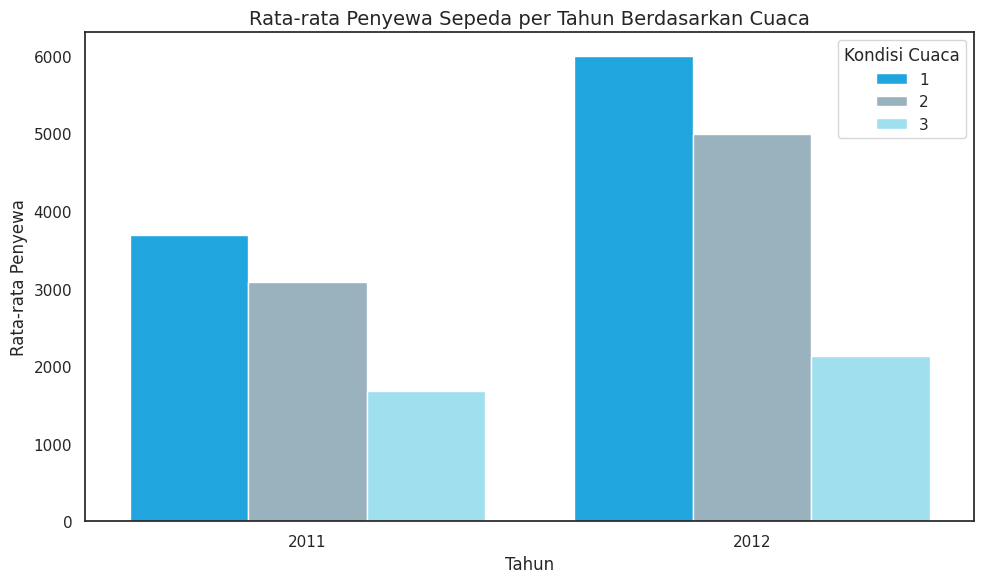

In [7]:
sns.set(style="white") #Untuk memunculkan style berupa white tanpa grid

plt.figure(figsize=(10, 6)) #Mengatur ukuran plot dari grafik

palette_col = ["#00B2FF","#94B3C4", "#93E7FB"] #Menginisiasi warna dari tiap bar cuaca

sns.barplot(x='Tahun', y='Rata-rata Penyewa', hue='Cuaca', data=weatherPredict, palette=palette_col) #Mengakses plot dengan sumbu x adalah kolom tahun dan y adalah kolom rata-rata penyewa
#yang diambil dari dataframe weather predict dengan warnanya mengikuti palette yang sudah disediakan diatas

plt.title('Rata-rata Penyewa Sepeda per Tahun Berdasarkan Cuaca', fontsize=14) #Menampilkan judul
plt.xlabel('Tahun', fontsize=12) #Menampilkan label sumbu x
plt.ylabel('Rata-rata Penyewa', fontsize=12) #Menampilkan laabel sumbu y
plt.legend(title='Kondisi Cuaca') #Menampilkan legend
plt.tight_layout()
plt.show()

### Pertanyaan 2:

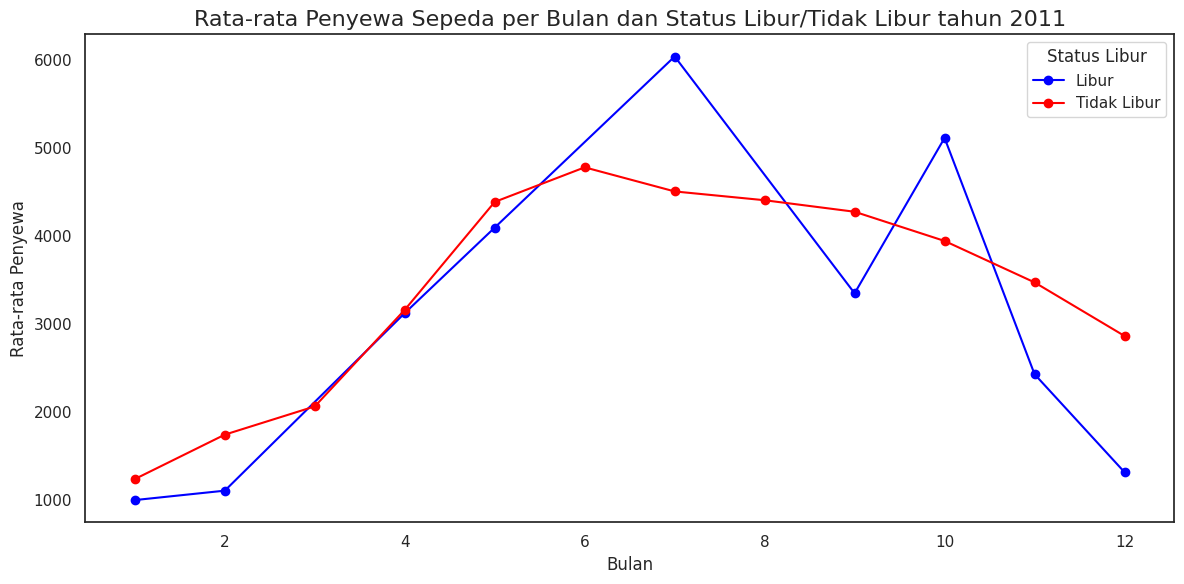

In [8]:
sns.set(style="white") #Untuk menghilangkan grid pada visualisasi
plt.figure(figsize=(12, 6)) #Mengatur ukuran plot dari grafik

dataLibur = holidayPredict[(holidayPredict["Libur"] == "Libur") & (holidayPredict["Tahun"] == 2011)] #Untuk menampilkan plot hari libur pada tahun 2011
dataTidakLibur = holidayPredict[(holidayPredict["Libur"] == "Tidak Libur") & (holidayPredict["Tahun"] == 2011)] #Untuk menampilkan plot hari tidak libur pada tahun 2011

plt.plot(dataLibur['Bulan'], dataLibur['average_rents'], marker='o', color='blue', label='Libur') #Untuk mengatur tampilan line libur
plt.plot(dataTidakLibur['Bulan'], dataTidakLibur['average_rents'], marker='o', color='red', label='Tidak Libur') #Untuk mengatur tampilan line tidak libur

plt.title('Rata-rata Penyewa Sepeda per Bulan dan Status Libur/Tidak Libur tahun 2011', fontsize=16)#Menampilkan judul
plt.xlabel('Bulan', fontsize=12) #Menampilkan label sumbu x
plt.ylabel('Rata-rata Penyewa', fontsize=12) #Menampilkan laabel sumbu y

plt.legend(title='Status Libur') #Menampilkan legend

plt.tight_layout()
plt.show()

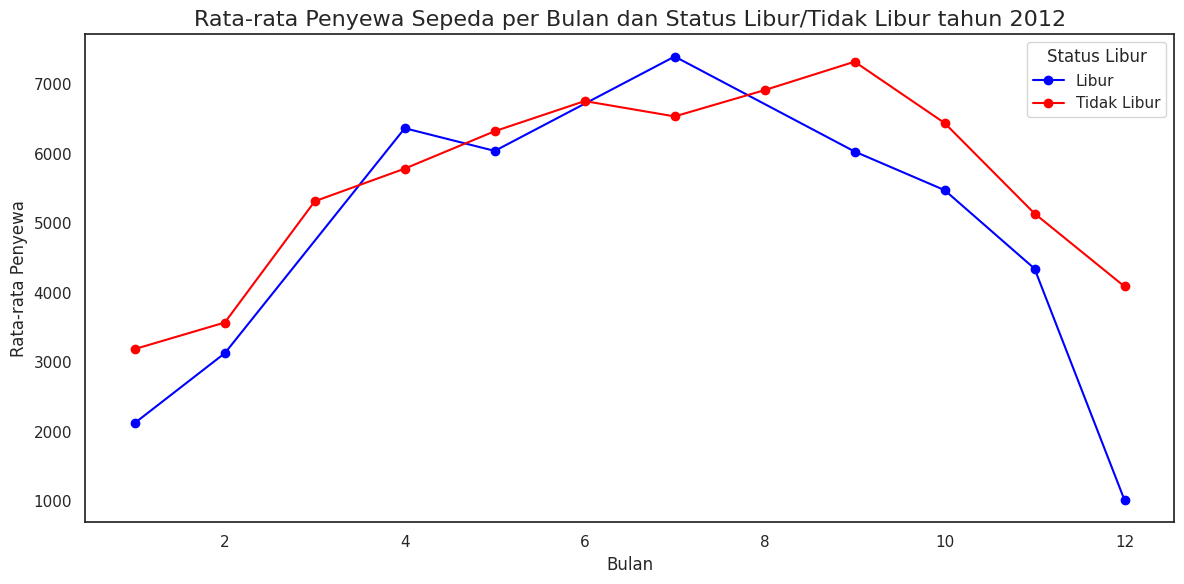

In [9]:
sns.set(style="white") #Untuk menghilangkan grid pada visualisasi

plt.figure(figsize=(12, 6))#Mengatur ukuran plot dari grafik

data_libur = holidayPredict[(holidayPredict["Libur"] == "Libur") & (holidayPredict["Tahun"] == 2012)] #Untuk menampilkan plot hari libur pada tahun 2012
data_tidak_libur = holidayPredict[(holidayPredict["Libur"] == "Tidak Libur") & (holidayPredict["Tahun"] == 2012)] #Untuk menampilkan plot hari tidak libur pada tahun 2012

plt.plot(data_libur['Bulan'], data_libur['average_rents'], marker='o', color='blue', label='Libur')#Untuk mengatur tampilan line libur
plt.plot(data_tidak_libur['Bulan'], data_tidak_libur['average_rents'], marker='o', color='red', label='Tidak Libur') #Untuk mengatur tampilan line tidak libur

plt.title('Rata-rata Penyewa Sepeda per Bulan dan Status Libur/Tidak Libur tahun 2012', fontsize=16) #Menampilkan judul
plt.xlabel('Bulan', fontsize=12) #Menampilkan label sumbu x
plt.ylabel('Rata-rata Penyewa', fontsize=12) #Menampilkan laabel sumbu y

plt.legend(title='Status Libur')#Menampilkan legend

plt.tight_layout()
plt.show()

**Insight:**
- Pada pertanyaan pertama, digunakan bar chart untuk menampilkan hasil pengaruh cuaca terhadap rata-rata penyewaan sepeda 2 tahun. Dari hasil dapat terlihat perbedaan jelas antara 3 kategori cuaca untuk tahun 2011 dan tahun 2012.
- Pada pertanyaan kedua, akan digunakan linechart untuk mengetahui apa hubungan hari libur dan tidak libur terhadap peningkatan maupun penurunan penyewaan sepeda pada setiap bulan pada tahun 2011 dan 2012. Pada plot digunakan 2 line chart yang merepresentasikan hari libur dan hari tidak libur dan dapat dilihat terdapat penambahan dan pengurangan jumlah penyewaan sepeda untuk setiap bulannya.

## Analisis Lanjutan (Opsional)

In [23]:
dfDay['Musim'] = pd.cut(dfDay['season'], bins=[0, 1, 2, 3, 4], labels=['Spring', 'Summer', 'Fall', 'Winter'])
season = dfDay.groupby('Musim')['cnt'].agg(['count', 'mean'])
season.columns = ['Jumlah Hari', 'Rata-rata Penyewaan']
print(season.to_markdown(numalign="left", stralign="left"))


| Musim   | Jumlah Hari   | Rata-rata Penyewaan   |
|:--------|:--------------|:----------------------|
| Spring  | 181           | 2604.13               |
| Summer  | 184           | 4992.33               |
| Fall    | 188           | 5644.3                |
| Winter  | 178           | 4728.16               |


<ipython-input-23-6e506b502515>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season = dfDay.groupby('Musim')['cnt'].agg(['count', 'mean'])


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

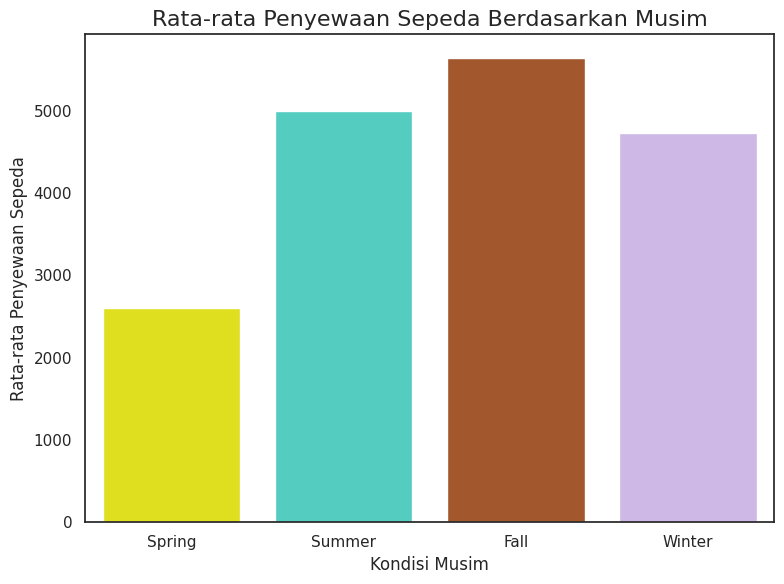

In [25]:
plt.figure(figsize=(8, 6)) #Mengatur ukuran plot dari grafik

palette_col = ["#FFFF00","#40E0D0", "#B55119", "#CDB0EE"]
sns.barplot(x=season.index, y=season['Rata-rata Penyewaan'], hue=season.index, palette=palette_col, legend=False)

# Menambahkan judul dan label sumbu
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim', fontsize=16)
plt.xlabel('Kondisi Musim', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=12)

# Menampilkan visualisasi
plt.tight_layout()
plt.show()

**Insight:**
- Pada analisis lanjutan ini, digunakan metode clustering yaitu binning untuk mengelompokkan penyewaan sepeda berdasarkan musim yang ada. Dengan Binning ini akan mengelompokkan data yang memiliki range tertentu pada musim tertentu. Misal jika data bernilai 1 atau kurang dari 2 maka akan masuk ke data musim semi.  Dari teknik ini dapat dilihat bahwa pada musim gugur adalah peak dari rata-rata penyewaan sepeda, sedangkan musim semi cenderung sedikit rata-rata penyewaan sepeda sehingga dari sini kita dapat menentukan strategi pemasaran seperti menyediakan lebih banyak sepeda pada musim gugur.

## Conclusion

- Dari visualisasi data untuk pertanyaan pertama, pada cuaca cerah, penyewaan sepeda selalu menjadi yang tertinggi sedangkan pada kondisi hujan, penyewaan sepeda cenderung kurang banyak sehingga dapat disimpulkan bahwa orang-orang lebih menyukai bersepeda pada hari yang cerah dibandingkan dengan cuaca lainnya, sehingga cuaca dianggap mempengaruhi keputusan orang untuk menyewa sepeda. Hal ini kemudian dapat digunakan sebagai melakukan strategi seperti misalnya pada kondisi hujan dapat dilakukan pengurangan staff sehingga bisa menekan biaya operasional atau analisis lainnya.

- Dari visualisasi data untuk pertanyaan kedua, terlihat bahwa pada tahun 2011 terjadi peningkatan penyewaan sepeda yang lebih tinggi pada hari libur dibandingkan dengan hari biasa (tidak libur).Namun jika diindentifikasi untuk setiap bulan, maka kecenderungan penyewaan sepeda ada pada hari biasa. Pada 2012 juga dapat dilihat bahwa peningkatan penyewaan sepeda pada setiap bulan di hari libur maupun tidak libur tidak memiliki perbedaan signifikan. Sehingga dapat disimpulkan bahwa hari libur tidak berpengaruh terlalu signifikan pada penyewaan sepeda.

In [12]:
dfDay.to_csv("dataDay.csv", index=False)
dfHour.to_csv("dataHour.csv", index=False)